# Probability and Statistics Case Study

# Unit 1

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math


## Normal Distribution 

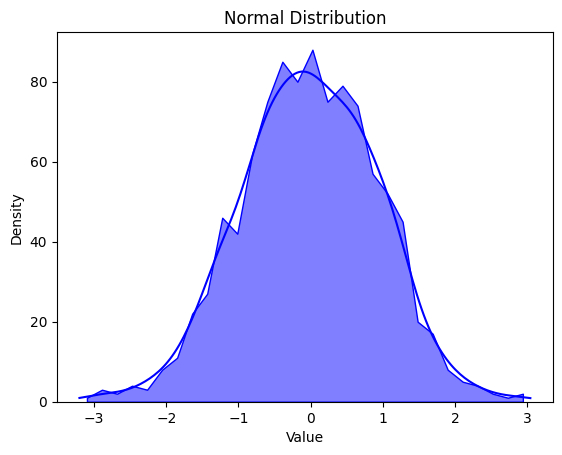

In [2]:
data = np.random.normal(loc=0, scale=1, size=1000)
sns.histplot(data, bins=30, kde=True, color='blue', element='poly')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Normal Distribution')

plt.show()

## Skewness 

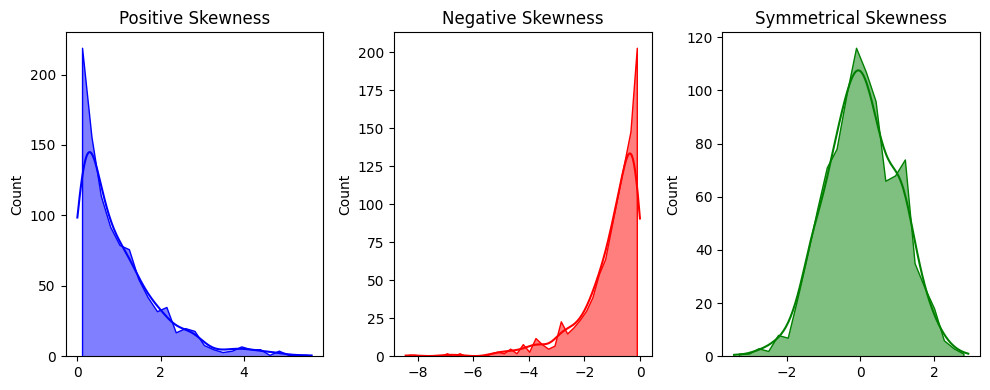

In [3]:
data_positive_skew = np.random.exponential(scale=1, size=1000)

data_negative_skew = -np.random.exponential(scale=1, size=1000)

data_symmetrical = np.random.normal(loc=0, scale=1, size=1000)

fig, axes = plt.subplots(1, 3, figsize=(10, 4))

sns.histplot(data=data_positive_skew, kde=True, color='blue', ax=axes[0], element = 'poly')
axes[0].set_title('Positive Skewness')

sns.histplot(data=data_negative_skew, kde=True, color='red', ax=axes[1], element = 'poly')
axes[1].set_title('Negative Skewness')

sns.histplot(data=data_symmetrical, kde=True, color='green', ax=axes[2], element = 'poly')
axes[2].set_title('Symmetrical Skewness')

plt.tight_layout()
plt.show()


## Kurtosis

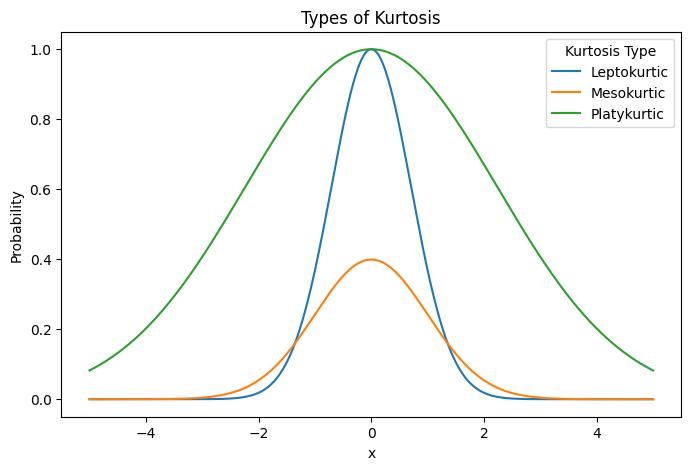

In [4]:
x = np.linspace(-5, 5, 1000)
# Define probability distributions
lepto = np.exp(-x**2)
meso = 1 / (np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)
platy = np.exp(-0.1 * x**2)

# Plot using Seaborn
plt.figure(figsize=(8, 5))
plt.plot(x, lepto, label='Leptokurtic')
plt.plot(x, meso, label='Mesokurtic')
plt.plot(x, platy, label='Platykurtic')
plt.title('Types of Kurtosis')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend(title='Kurtosis Type')
plt.show()

## Relation between Central and Non-Central

As we have proved in the assignment the central moments are:

μ₀ = 1

μ₁ = 0

μ₂ = μ₂' - (μ₁')²

μ₃ = μ₃' - 3μ₂'μ₁' + (μ₁')³

μ₄ = μ₄' - 4μ₃'μ₁' + 6μ₂'(μ₁')² - 3(μ₁')⁴

## Application 

In [1]:
df = pd.read_csv('math1.csv')
df

NameError: name 'pd' is not defined

In [6]:
A = 7.5 #(Mid Value)
n = 5
h = 1
df['di'] = (df.Class - A)/h
df['di^2'] = df.di ** 2
df['di^3'] = df.di ** 3
df['di^4'] = df.di ** 4
disum = df['di'].sum()
di2sum = df['di^2'].sum()
di3sum = df['di^3'].sum()
di4sum = df['di^4'].sum()

df

,Class,Frequency,di,di^2,di^3,di^4
0,10,85,2.5,6.25,15.625,39.0625
1,9,67,1.5,2.25,3.375,5.0625
2,8,72,0.5,0.25,0.125,0.0625
3,7,78,-0.5,0.25,-0.125,0.0625
4,6,64,-1.5,2.25,-3.375,5.0625
5,5,70,-2.5,6.25,-15.625,39.0625


In [7]:
μ0dash = 1
μ1dash = disum/n
μ2dash = di2sum/n
μ3dash = di3sum/n
μ4dash = di4sum/n
print(μ0dash)
print(μ1dash)
print(μ2dash)
print(μ3dash)
print(μ4dash)

1
0.0
3.5
0.0
17.675


Now, we know that:

μ₀ = 1

μ₁ = 0

μ₂ = μ₂' - (μ₁')²

μ₃ = μ₃' - 3μ₂'μ₁' + (μ₁')³

μ₄ = μ₄' - 4μ₃'μ₁' + 6μ₂'(μ₁')² - 3(μ₁')⁴

In [8]:
μ0 = 1
μ1 = 0
μ2 = μ2dash - (μ1dash**2)
μ3 = μ3dash - 3*μ2dash*μ1dash + (μ1dash**3)
μ4 = μ4dash - 4*μ3dash*μ1dash + 6*μ2dash*(μ1dash**2) - 3*(μ1dash**4)
print(μ0)
print(μ1)
print(μ2)
print(μ3)
print(μ4)

1
0
3.5
0.0
17.675


In [9]:
#Sheppard's Correction
μ2corr = μ2  - (h**2)/12
μ4corr = μ4 - ((h**2)/2) * μ2 + (7/240)*(h**4)
print(μ2corr)
print(μ4corr)

3.4166666666666665
15.954166666666667


# Unit 2

## Curve Fitting

## Straight Line


The technique of finding the expected values of a variable is known as fitting

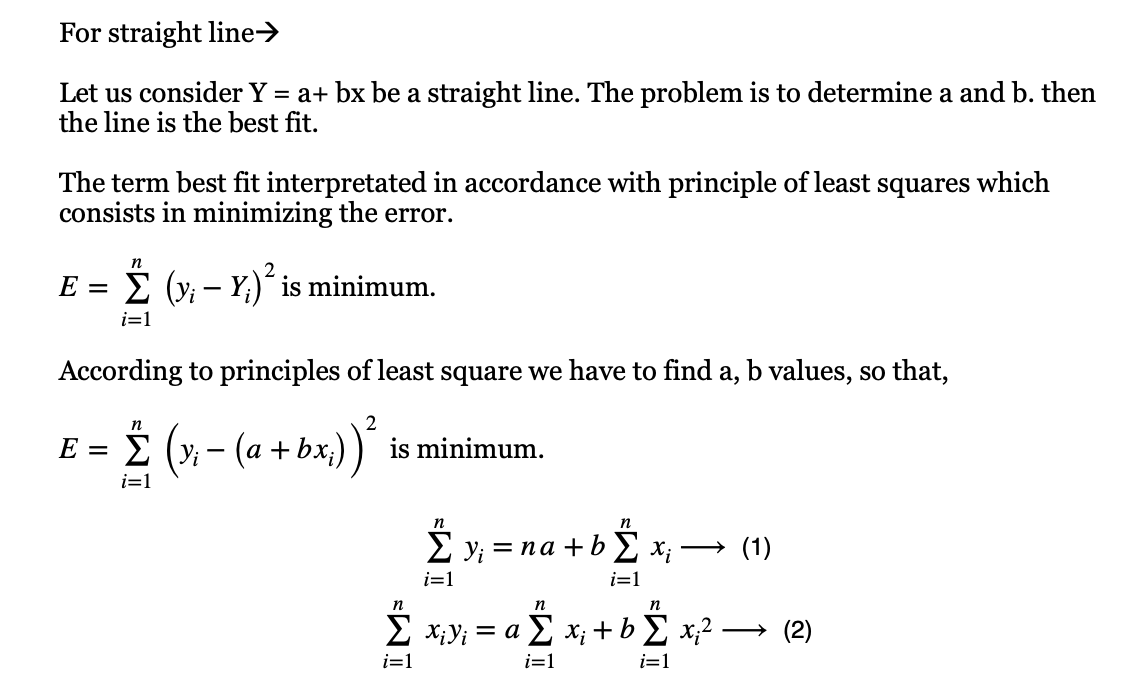

In [10]:
df = pd.read_csv('Unit21.csv')
df

,Roll No.,Height
0,1,143
1,2,149
2,3,154
3,4,160
4,5,167
5,6,173
6,7,180
7,8,181
8,9,186


In [11]:
df['x^2'] = df['Roll No.']**2
df['xy'] = df['Roll No.']* df['Height']
n = 9
x_sum = df['Roll No.'].sum()
y_sum = df['Height'].sum()
x2_sum = df['x^2'].sum()
xy_sum = df['xy'].sum()
print(x_sum,y_sum,x2_sum,xy_sum)

45 1493 285 7798


In [12]:
a1 = n
b1 = x_sum
c1 = y_sum
a2 = x_sum
b2 = x2_sum
c2 = xy_sum

A = np.array([[a1,b1],[a2,b2]])
B = np.array([c1,c2])

solution = np.linalg.solve(A,B)
a = solution[0]
b = solution[1]
print(a,b)

138.1388888888888 5.550000000000011


In [13]:
df['y'] = a+ b*df['Roll No.'] 
df

,Roll No.,Height,x^2,xy,y
0,1,143,1,143,143.688889
1,2,149,4,298,149.238889
2,3,154,9,462,154.788889
3,4,160,16,640,160.338889
4,5,167,25,835,165.888889
5,6,173,36,1038,171.438889
6,7,180,49,1260,176.988889
7,8,181,64,1448,182.538889
8,9,186,81,1674,188.088889


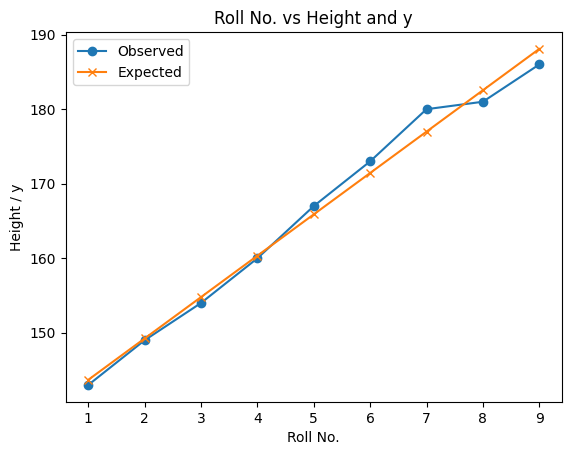

In [14]:
plt.plot(df['Roll No.'], df['Height'], label='Observed', marker='o')

plt.plot(df['Roll No.'], df['y'], label='Expected', marker='x')

plt.xlabel('Roll No.')
plt.ylabel('Height / y')
plt.title('Roll No. vs Height and y')
plt.legend()

plt.show()

## Second Degree Parabola

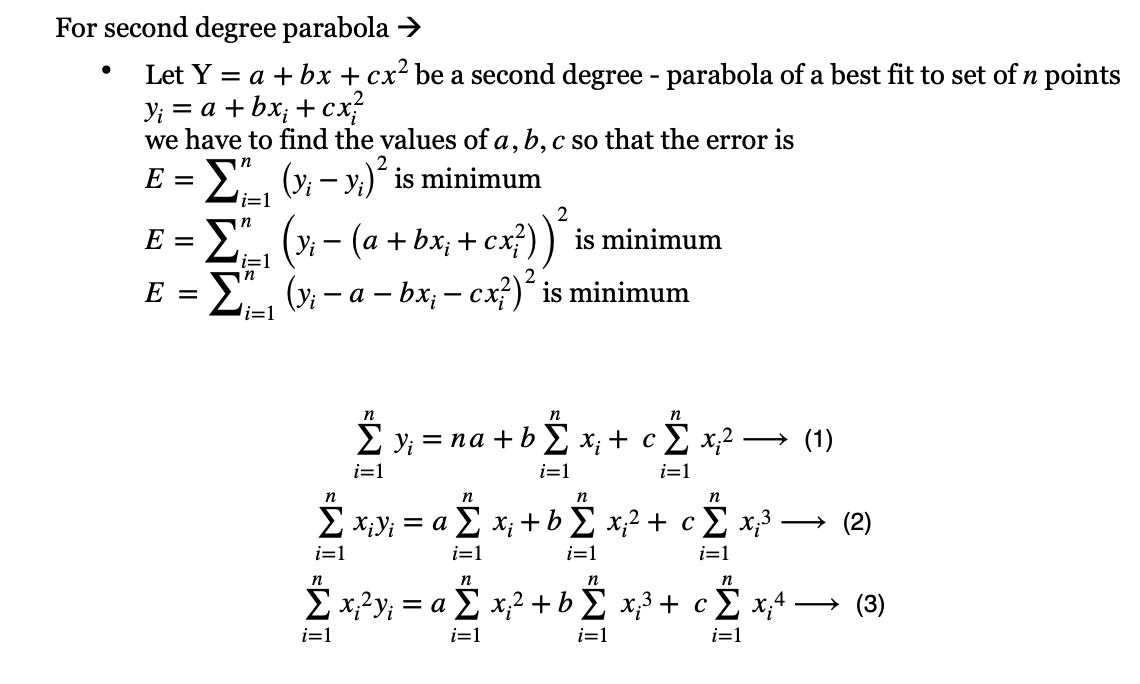

In [15]:
df = pd.read_csv('Unit22.csv')
df

,Emp No.,Salary
0,24,15000
1,32,14000
2,40,13000
3,48,12000
4,56,10000
5,64,11000
6,72,12000
7,80,17000
8,88,19000


In [16]:
mid = 56
h = 8
df['t'] = (df['Emp No.'] - mid)/h
df

,Emp No.,Salary,t
0,24,15000,-4.0
1,32,14000,-3.0
2,40,13000,-2.0
3,48,12000,-1.0
4,56,10000,0.0
5,64,11000,1.0
6,72,12000,2.0
7,80,17000,3.0
8,88,19000,4.0


In [17]:
df['t^2'] = df['t']**2
df['ty'] = df['t']* df['Salary']
df['t2y'] = df['t^2']* df['Salary']
df['t^3'] = df['t']**3
df['t^4'] = df['t']**4



n = 9
t_sum = df['t'].sum()
y_sum = df['Salary'].sum()
t2_sum = df['t^2'].sum()
ty_sum = df['ty'].sum()
t2y_sum = df['t2y'].sum()
t3_sum = df['t^3'].sum()
t4_sum = df['t^4'].sum()

df

,Emp No.,Salary,t,t^2,ty,t2y,t^3,t^4
0,24,15000,-4.0,16.0,-60000.0,240000.0,-64.0,256.0
1,32,14000,-3.0,9.0,-42000.0,126000.0,-27.0,81.0
2,40,13000,-2.0,4.0,-26000.0,52000.0,-8.0,16.0
3,48,12000,-1.0,1.0,-12000.0,12000.0,-1.0,1.0
4,56,10000,0.0,0.0,0.0,0.0,0.0,0.0
5,64,11000,1.0,1.0,11000.0,11000.0,1.0,1.0
6,72,12000,2.0,4.0,24000.0,48000.0,8.0,16.0
7,80,17000,3.0,9.0,51000.0,153000.0,27.0,81.0
8,88,19000,4.0,16.0,76000.0,304000.0,64.0,256.0


In [18]:
a1 = n
b1 = t_sum
c1 = t2_sum
d1 = y_sum
a2 = t_sum
b2 = t2_sum
c2 = t3_sum
d2 = ty_sum
a3 = t2_sum
b3 = t3_sum
c3 = t4_sum
d3 = t2y_sum

A = np.array([[a1,b1,c1],[a2,b2,c2],[a3,b3,c3]])

B = np.array([d1,d2,d3])

solution = np.linalg.solve(A,B)
a = solution[0]
b = solution[1]
c = solution[2]
print(a,b,c)


10939.39393939394 366.6666666666667 409.09090909090907


In [19]:
df['y'] = a + b*df['t'] + c*df['t^2']
df

,Emp No.,Salary,t,t^2,ty,t2y,t^3,t^4,y
0,24,15000,-4.0,16.0,-60000.0,240000.0,-64.0,256.0,16018.181818
1,32,14000,-3.0,9.0,-42000.0,126000.0,-27.0,81.0,13521.212121
2,40,13000,-2.0,4.0,-26000.0,52000.0,-8.0,16.0,11842.424242
3,48,12000,-1.0,1.0,-12000.0,12000.0,-1.0,1.0,10981.818182
4,56,10000,0.0,0.0,0.0,0.0,0.0,0.0,10939.393939
5,64,11000,1.0,1.0,11000.0,11000.0,1.0,1.0,11715.151515
6,72,12000,2.0,4.0,24000.0,48000.0,8.0,16.0,13309.090909
7,80,17000,3.0,9.0,51000.0,153000.0,27.0,81.0,15721.212121
8,88,19000,4.0,16.0,76000.0,304000.0,64.0,256.0,18951.515152


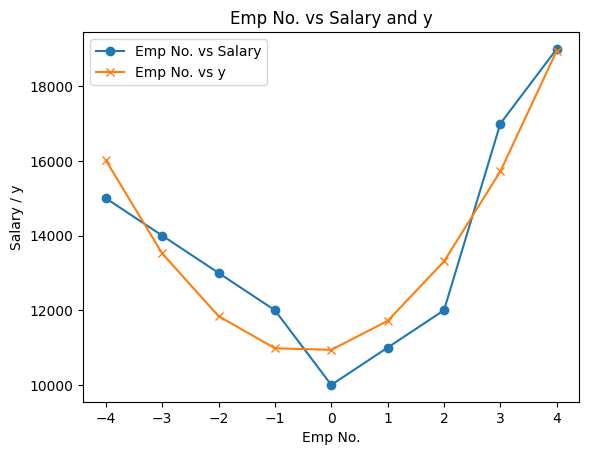

In [20]:
plt.plot(df['t'], df['Salary'], label='Emp No. vs Salary', marker='o')

plt.plot(df['t'], df['y'], label='Emp No. vs y', marker='x')

plt.xlabel('Emp No.')
plt.ylabel('Salary / y')
plt.title('Emp No. vs Salary and y')
plt.legend()

plt.show()

## EXPONENTIAL CURVE

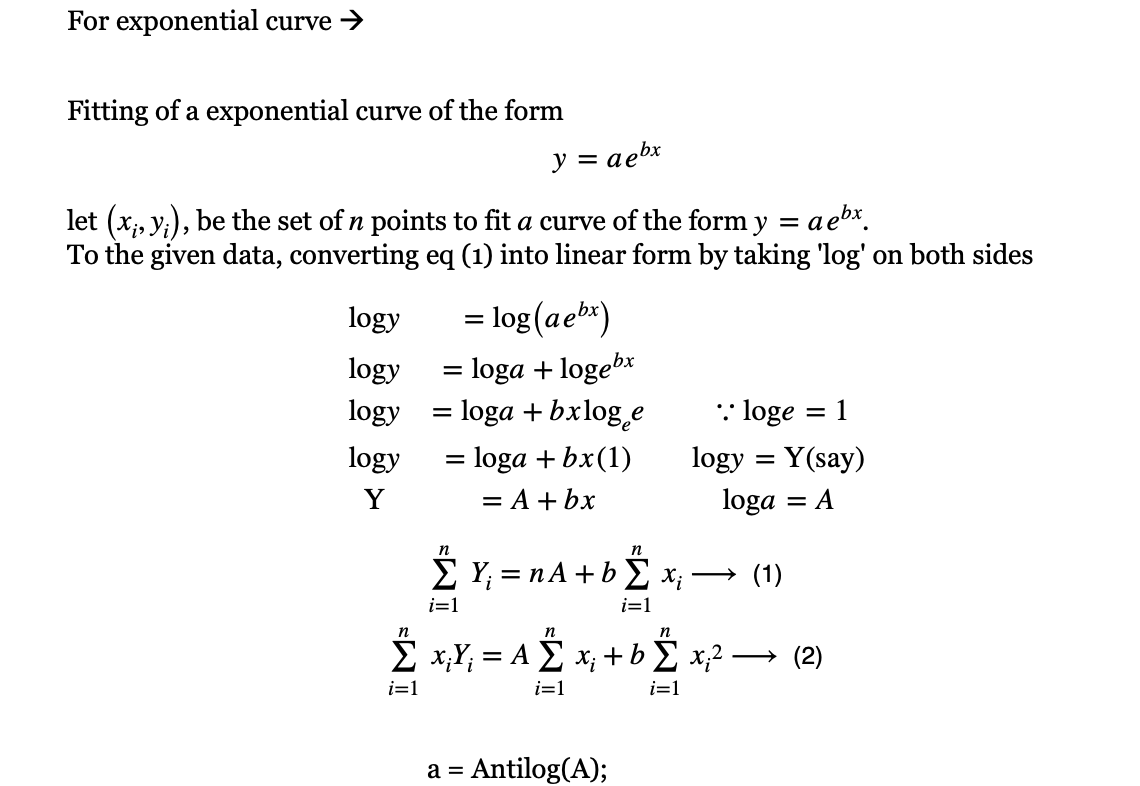

In [21]:
df = pd.read_csv('Unit23.csv')
df

,Sem,Stress
0,1,5
1,2,25
2,3,625
3,4,3125
4,5,15625


In [22]:
df['x^2'] = df['Sem']**2
df['Y'] = df['Stress'].apply(math.log)
df['xY'] = df['Sem']* df['Y']

n = 5
x_sum = df['Sem'].sum()
Y_sum = df['Y'].sum()
x2_sum = df['x^2'].sum()
xY_sum = df['xY'].sum()

df

,Sem,Stress,x^2,Y,xY
0,1,5,1,1.609438,1.609438
1,2,25,4,3.218876,6.437752
2,3,625,9,6.437752,19.313255
3,4,3125,16,8.047190,32.188758
4,5,15625,25,9.656627,48.283137


In [23]:
a1 = n
b1 = x_sum
c1 = Y_sum
a2 = x_sum
b2 = x2_sum
c2 = xY_sum

x = np.array([[a1,b1],[a2,b2]])
y = np.array([c1,c2])

solution = np.linalg.solve(x,y)
A = solution[0]
b = solution[1]
print(a,b)

10939.39393939394 2.09226928616433


a = Antilog(A)

In [24]:
a = math.exp(A)
a

0.6170338627200112

In [25]:
df['y'] = df['Sem'].apply(lambda x: a * math.exp(b * x))
df

,Sem,Stress,x^2,Y,xY,y
0,1,5,1,1.609438,1.609438,5.000000
1,2,25,4,3.218876,6.437752,40.516415
2,3,625,9,6.437752,19.313255,328.315976
3,4,3125,16,8.047190,32.188758,2660.437258
4,5,15625,25,9.656627,48.283137,21558.275960


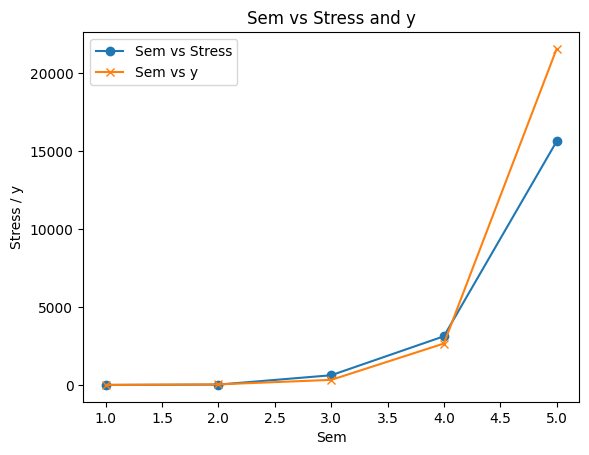

In [26]:
plt.plot(df['Sem'], df['Stress'], label='Sem vs Stress', marker='o')

plt.plot(df['Sem'], df['y'], label='Sem vs y', marker='x')

plt.xlabel('Sem')
plt.ylabel('Stress / y')
plt.title('Sem vs Stress and y')
plt.legend()

plt.show()

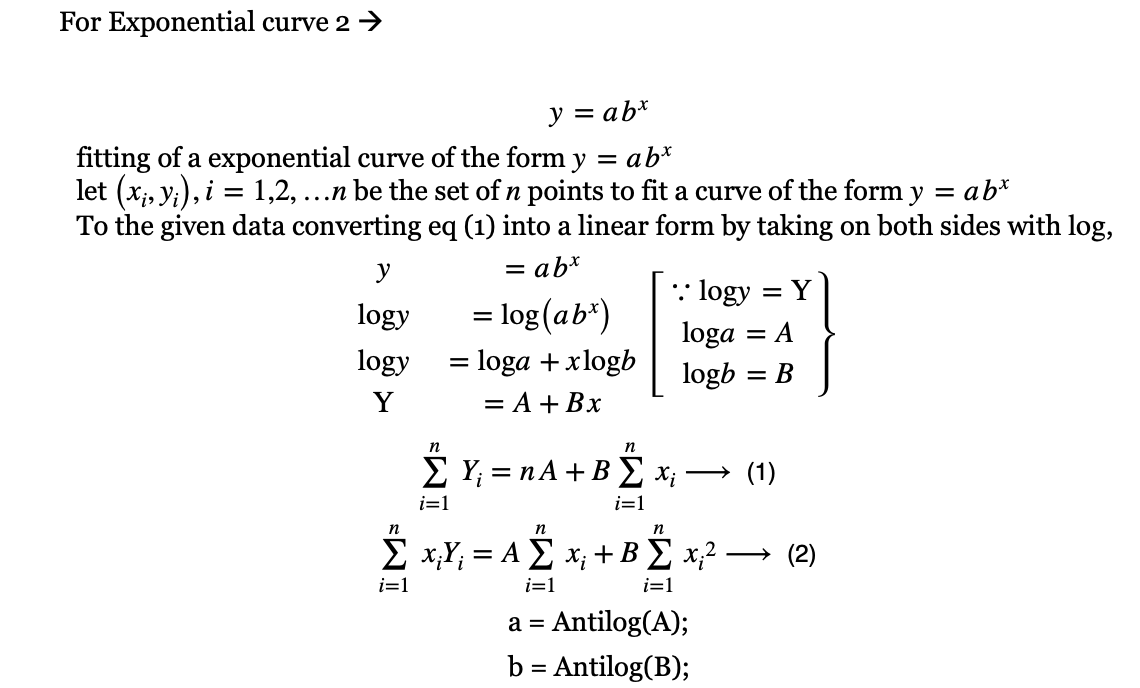

### SAME AS THE ABOVE ....

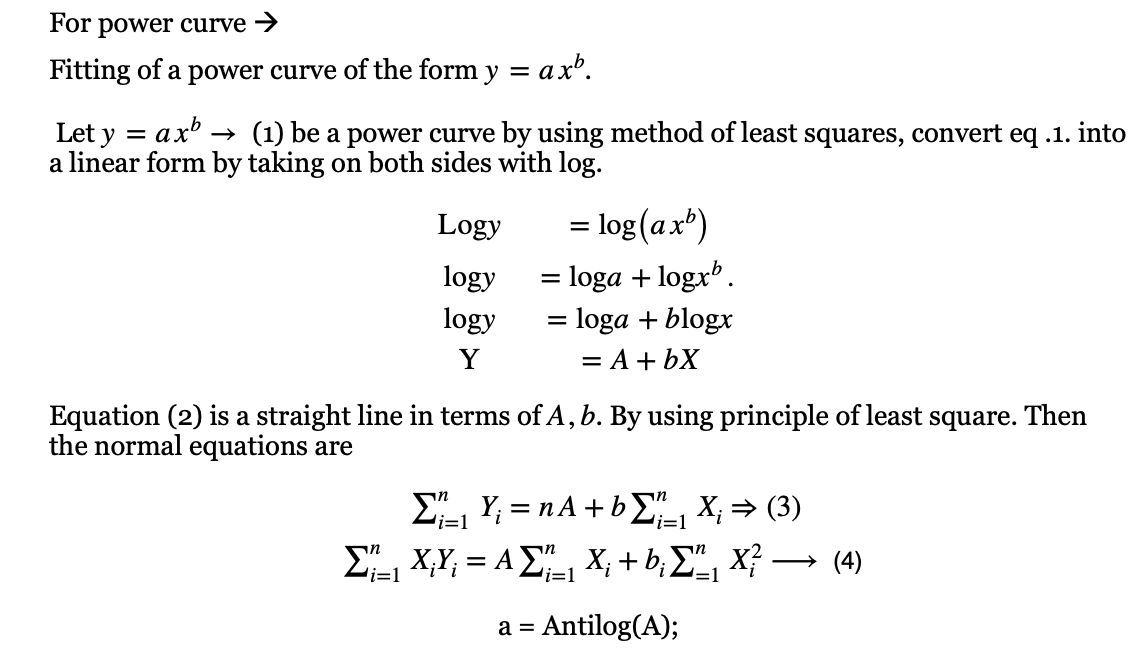

In [27]:
df = pd.read_csv('Unit24.csv')
df

,Wind,Power
0,2,1
1,4,10
2,6,50
3,8,150
4,10,300


In [28]:
#X = log(x)
#Y = log(y)

df['X'] = np.log(df['Wind'])
df['Y'] = np.log(df['Power'])
df['XY'] = df['X']* df['Y']
df['X^2'] = df['X']**2

n = 5
X_sum = df['X'].sum()
Y_sum = df['Y'].sum()
X2_sum = df['X^2'].sum()
XY_sum = df['XY'].sum()

df

,Wind,Power,X,Y,XY,X^2
0,2,1,0.693147,0.000000,0.000000,0.480453
1,4,10,1.386294,2.302585,3.192061,1.921812
2,6,50,1.791759,3.912023,7.009404,3.210402
3,8,150,2.079442,5.010635,10.419323,4.324077
4,10,300,2.302585,5.703782,13.133444,5.301898


In [29]:
a1 = n
b1 = X_sum
c1 = Y_sum
a2 = X_sum
b2 = X2_sum
c2 = XY_sum

x = np.array([[a1,b1],[a2,b2]])
y = np.array([c1,c2])

solution = np.linalg.solve(x,y)
A = solution[0]
b = solution[1]
print(A,b)

-2.5510537974653853 3.5966892141152274


a = Antilog(A)

In [30]:
a = math.exp(A)
a

0.07799942707862259

In [31]:
df['y'] = a*(df['Wind']**b)
df

,Wind,Power,X,Y,XY,X^2,y
0,2,1,0.693147,0.000000,0.000000,0.480453,0.943632
1,4,10,1.386294,2.302585,3.192061,1.921812,11.416003
2,6,50,1.791759,3.912023,7.009404,3.210402,49.074922
3,8,150,2.079442,5.010635,10.419323,4.324077,138.110096
4,10,300,2.302585,5.703782,13.133444,5.301898,308.163095


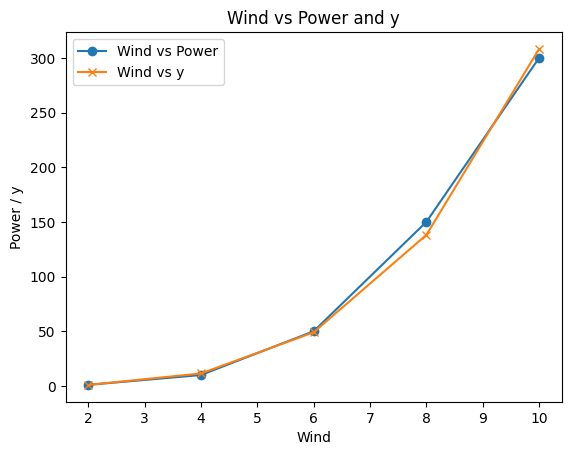

In [32]:
plt.plot(df['Wind'], df['Power'], label='Wind vs Power', marker='o')

plt.plot(df['Wind'], df['y'], label='Wind vs y', marker='x')

plt.xlabel('Wind')
plt.ylabel('Power / y')
plt.title('Wind vs Power and y')
plt.legend()

plt.show()

# Unit 3

## Generating Functions

MGF = moment generating function

CF      = characteristic function

CGF   = cumulative generating function

PGF   = probability generating function


## Distributions

Bernoulli’s distribution

Binomial distribution

Poisson distribution

Geometric distribution

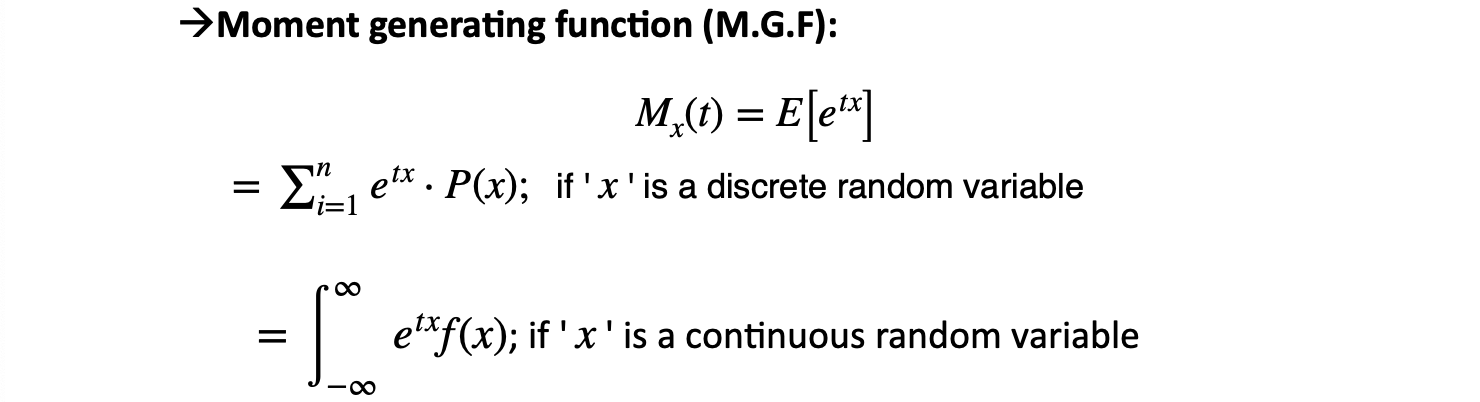

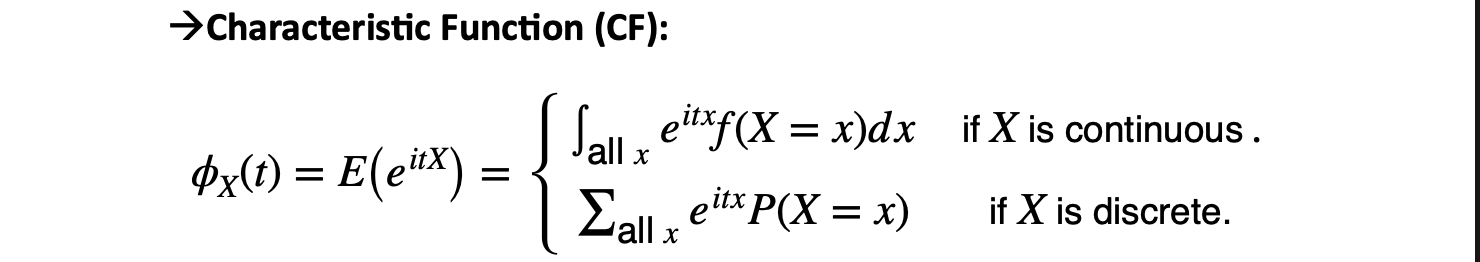

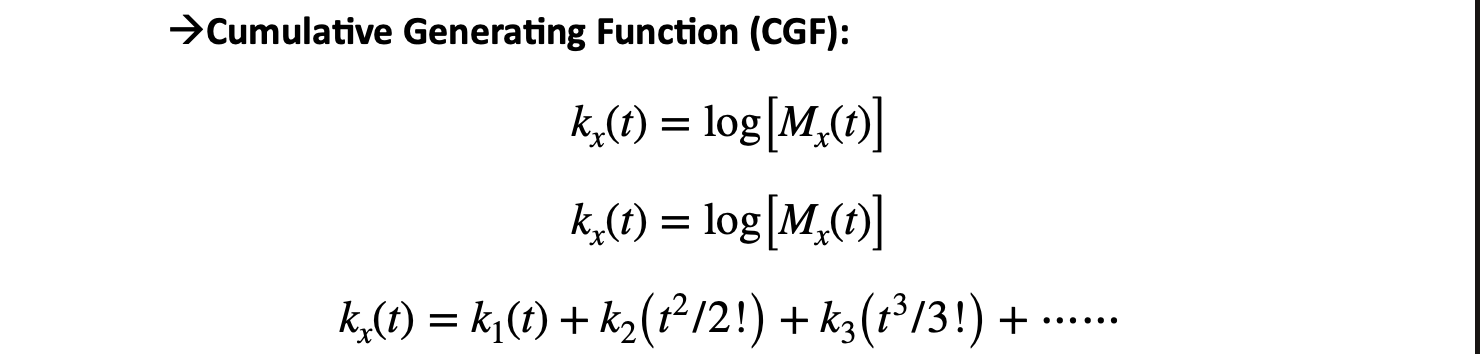

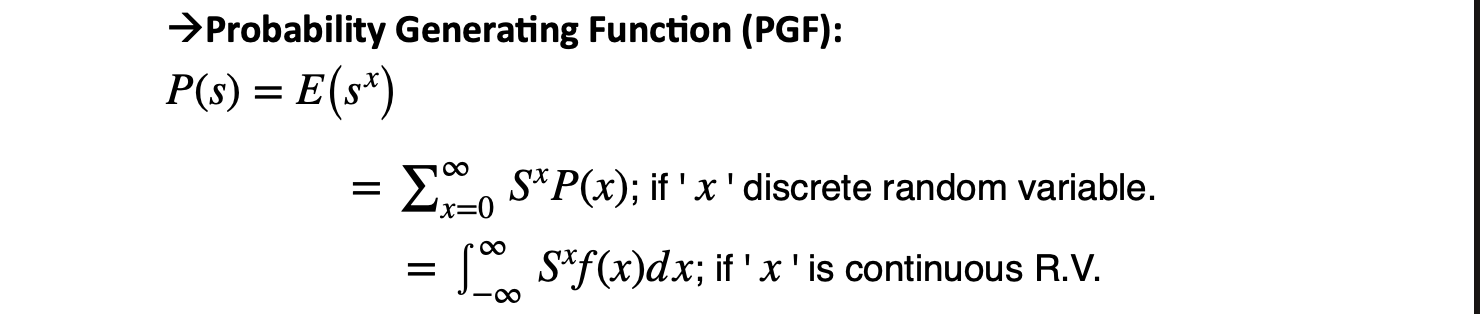

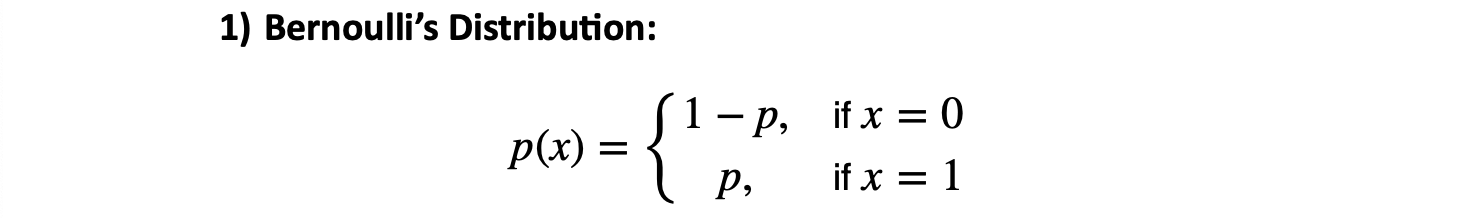


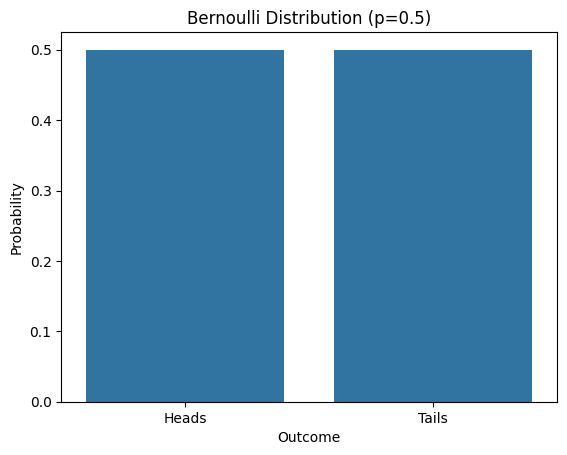

In [33]:
p = 0.5
data = ['Heads', 'Tails']
pmf = [1-p, p]
sns.barplot(x=data, y=pmf)
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.title('Bernoulli Distribution (p={})'.format(p))
plt.show()

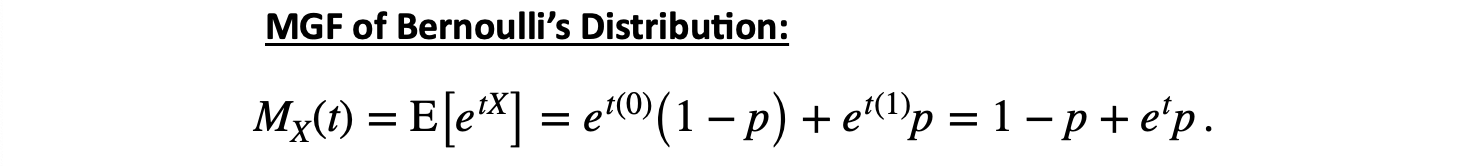

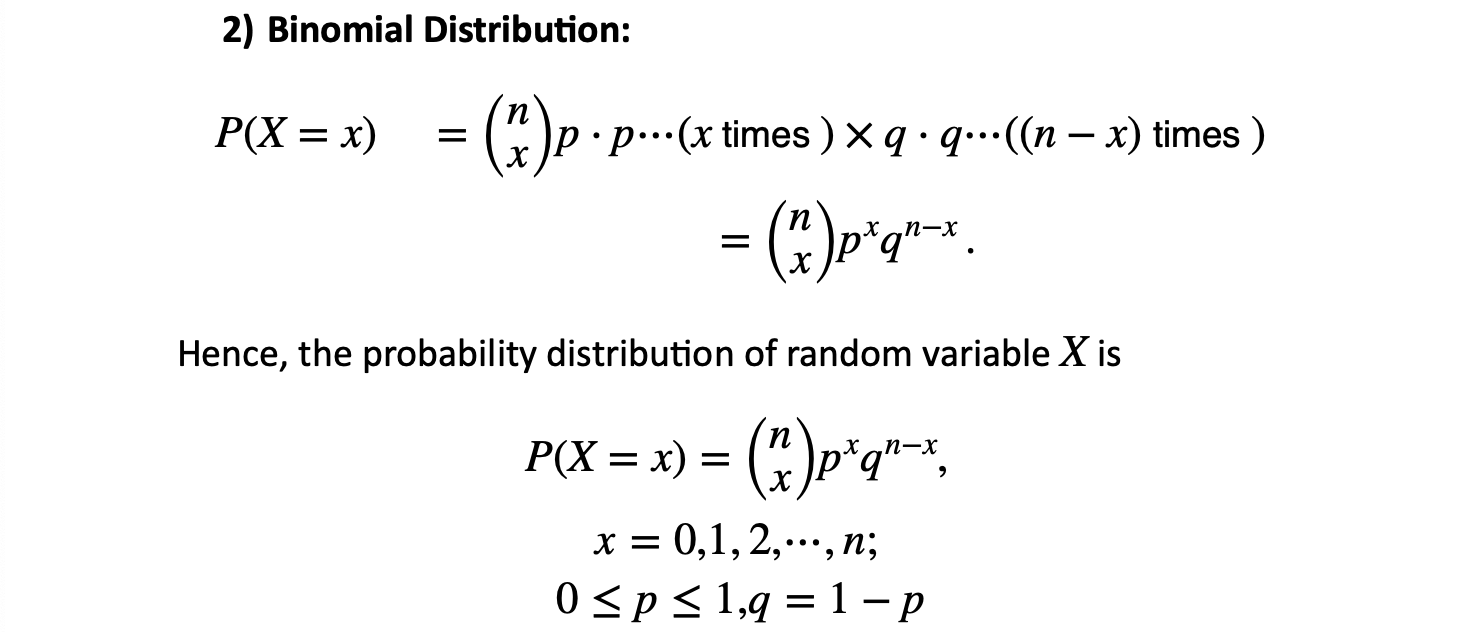

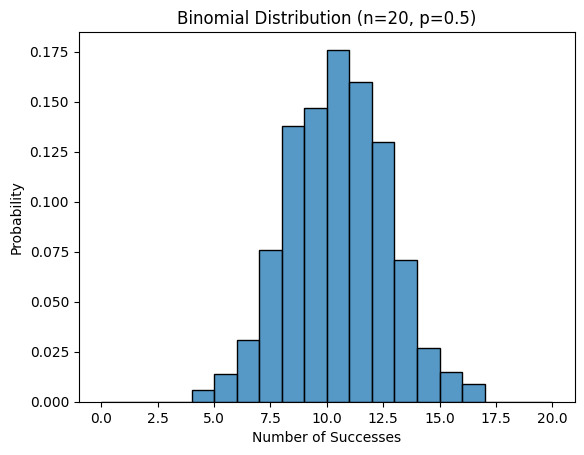

In [34]:
n = 20
p = 0.5  
size = 1000  

data = np.random.binomial(n, p, size)

sns.histplot(data, bins=np.arange(n + 1), stat="probability", kde=False)
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.xlabel("Number of Successes")
plt.ylabel("Probability")
plt.show()


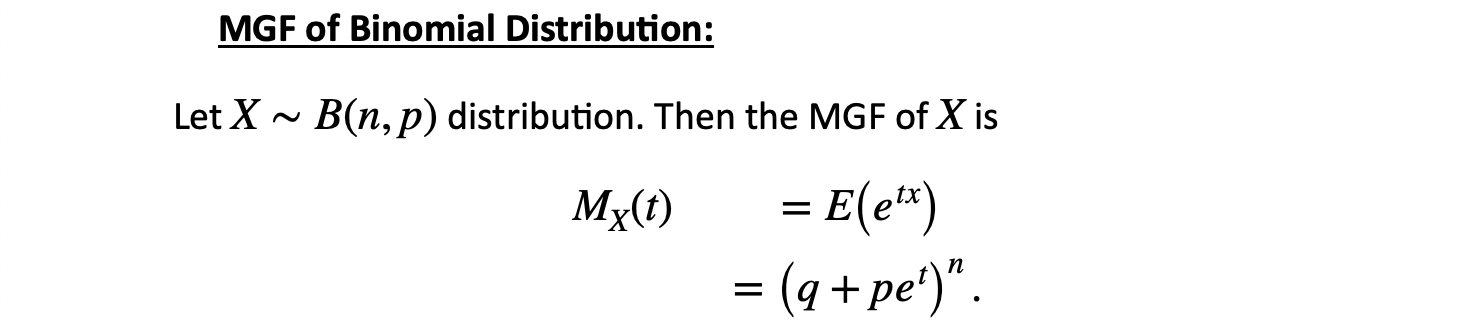

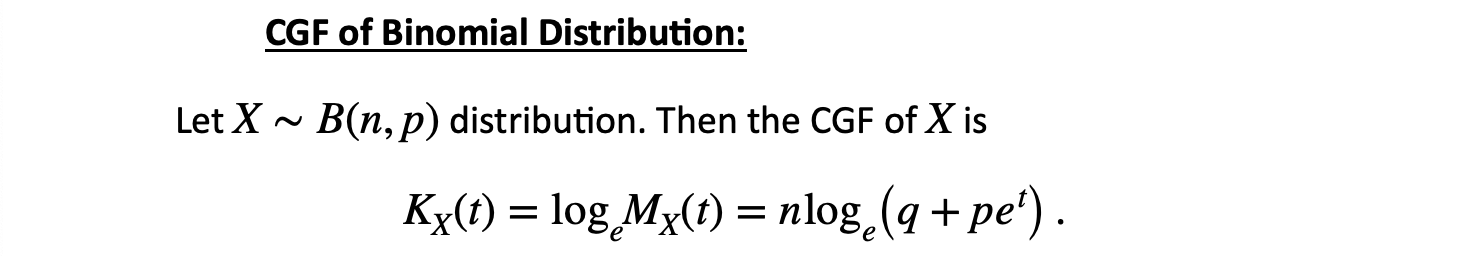

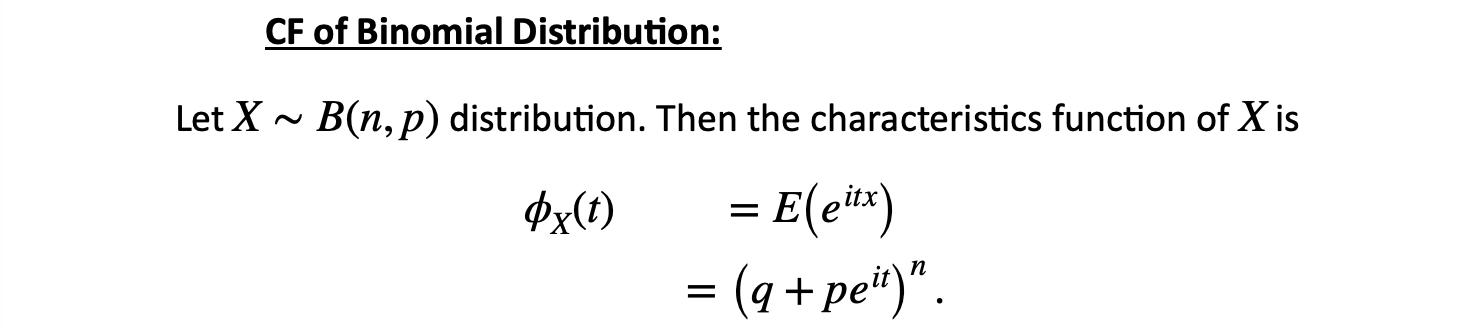

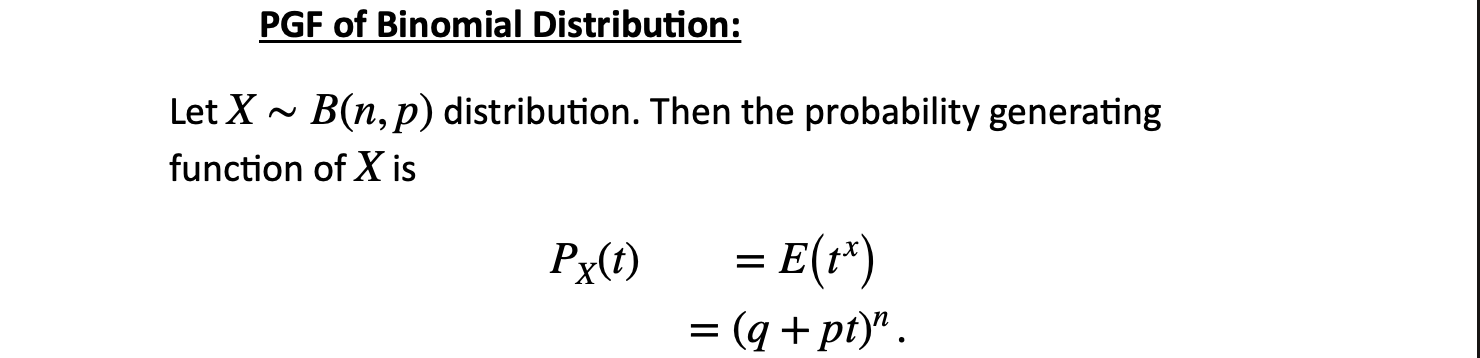

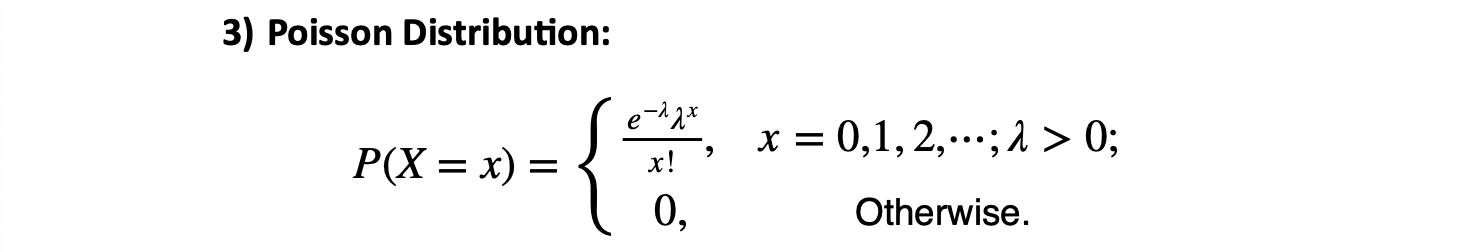

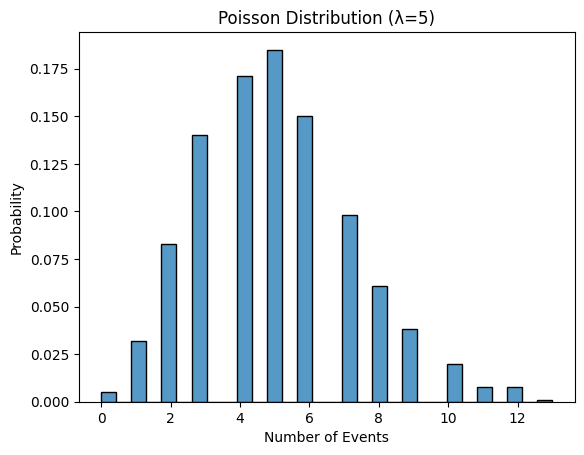

In [35]:
lam = 5  
size = 1000  

data = np.random.poisson(lam, size)

sns.histplot(data, bins=30, stat="probability", kde=False)
plt.title(f"Poisson Distribution (λ={lam})")
plt.xlabel("Number of Events")
plt.ylabel("Probability")
plt.show()

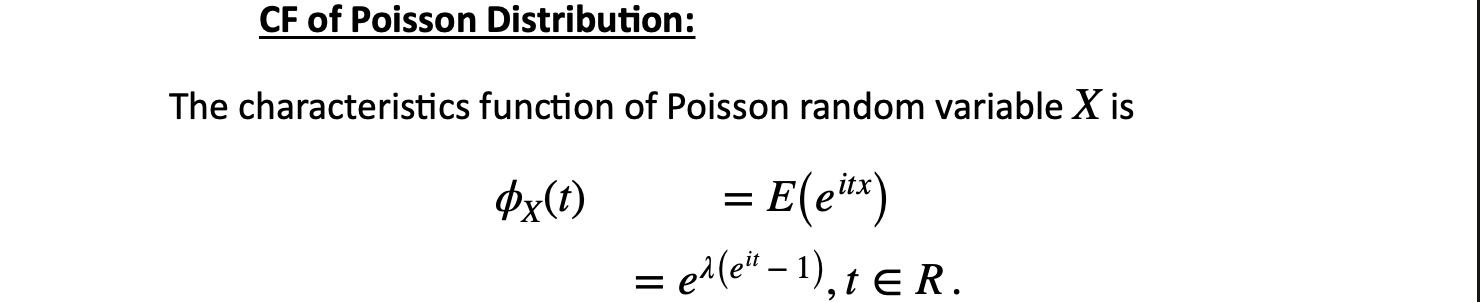

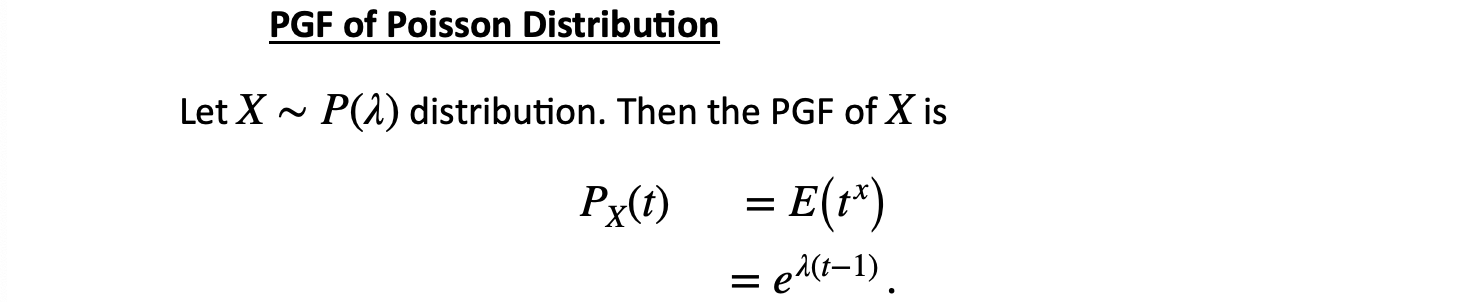

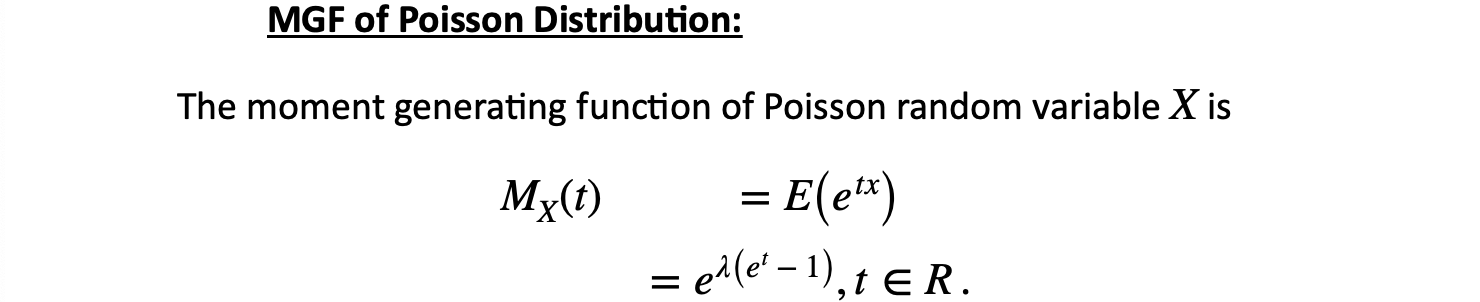

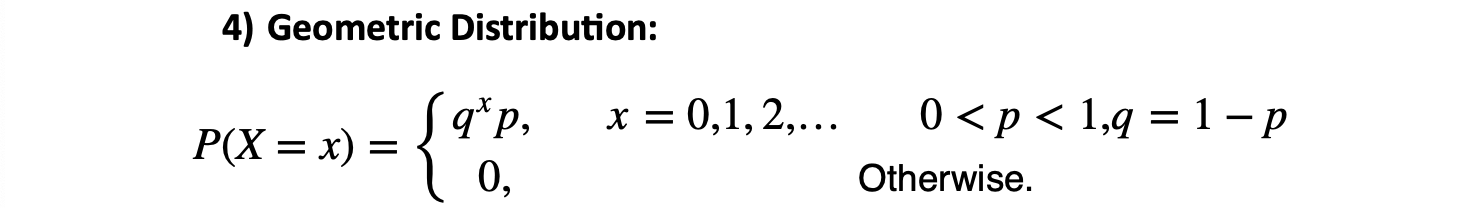

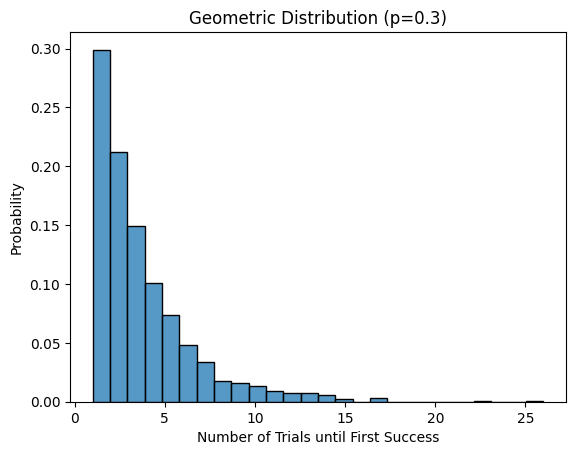

In [36]:
p = 0.3 
size = 1000 

data = np.random.geometric(p, size)

sns.histplot(data, bins=np.max(data), stat="probability", kde=False)
plt.title(f"Geometric Distribution (p={p})")
plt.xlabel("Number of Trials until First Success")
plt.ylabel("Probability")
plt.show()

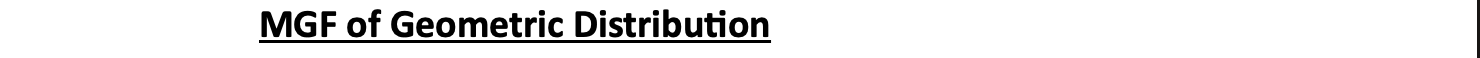

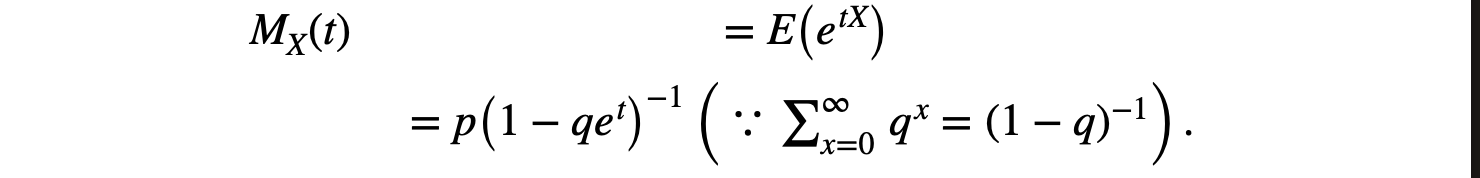

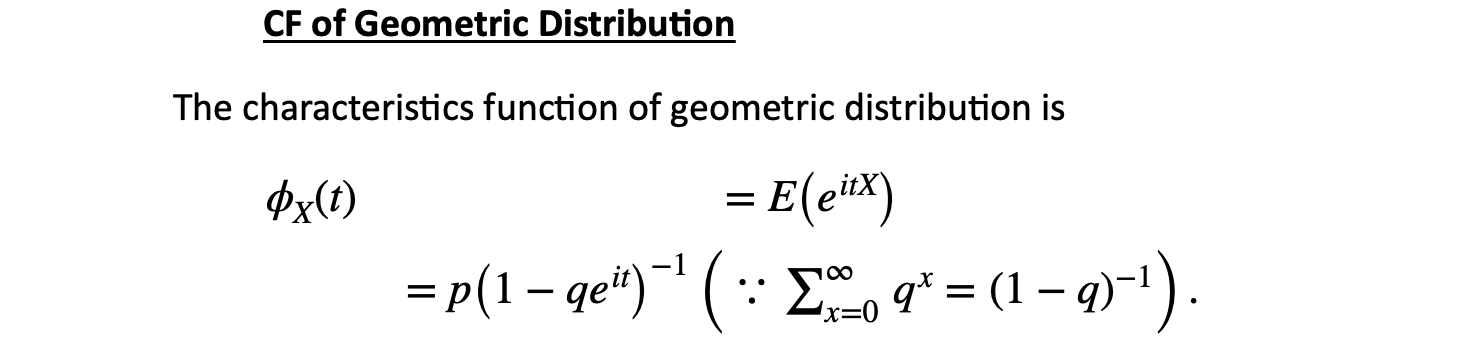

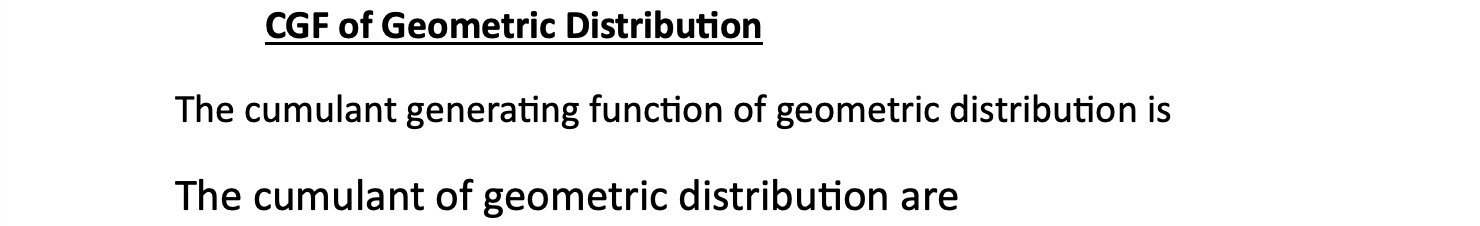

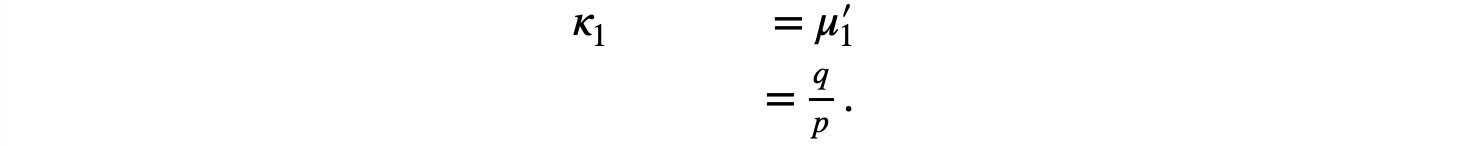

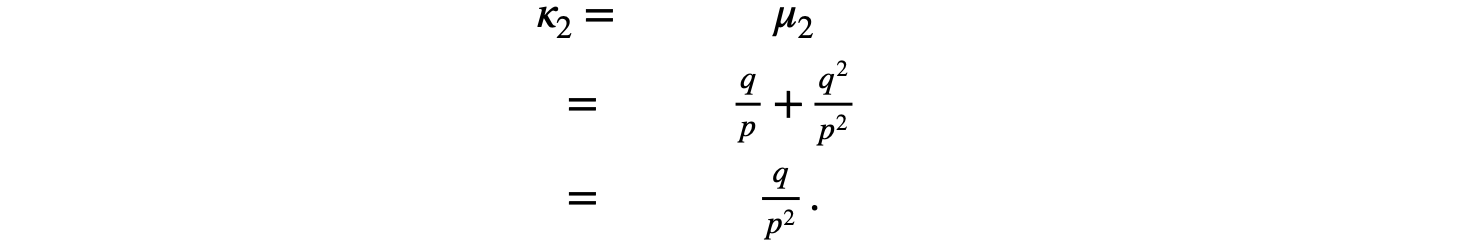

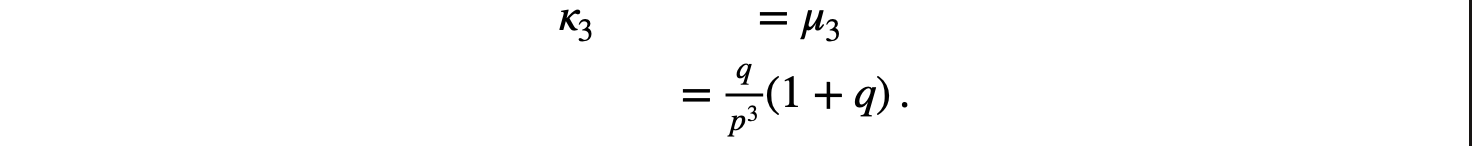

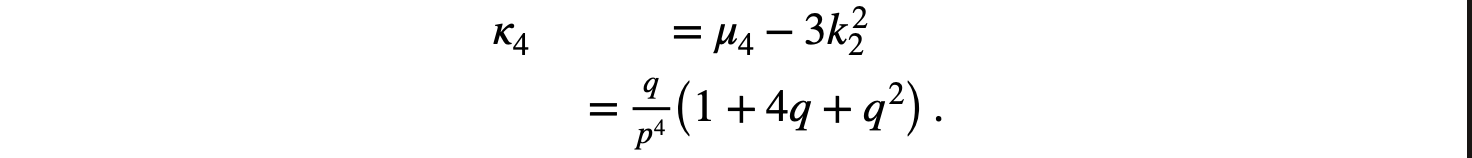

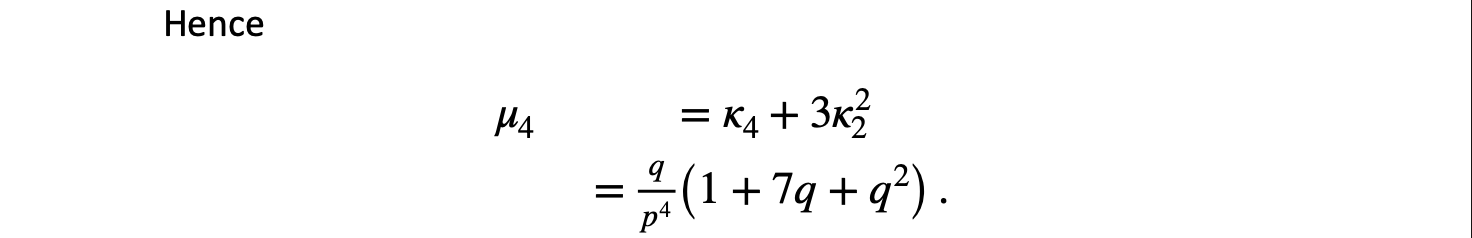

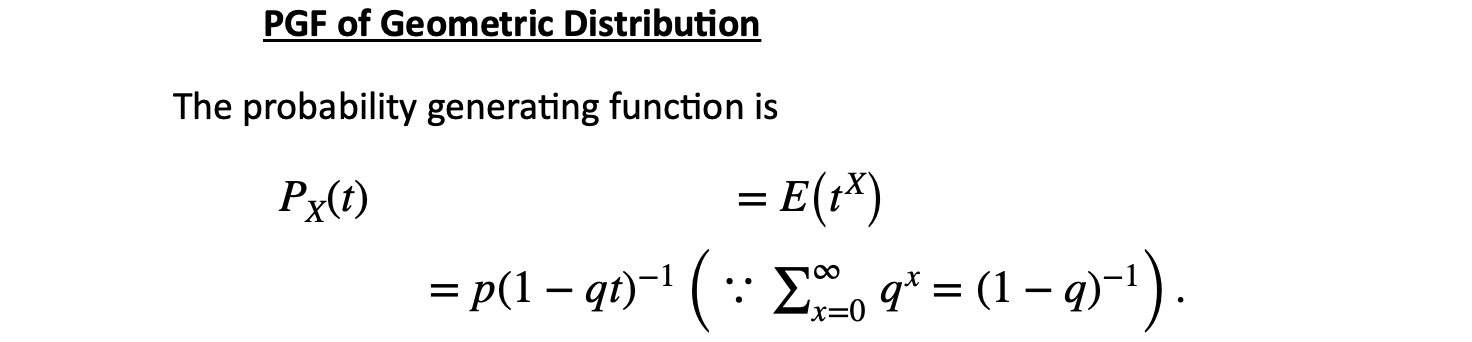

# Unit 4

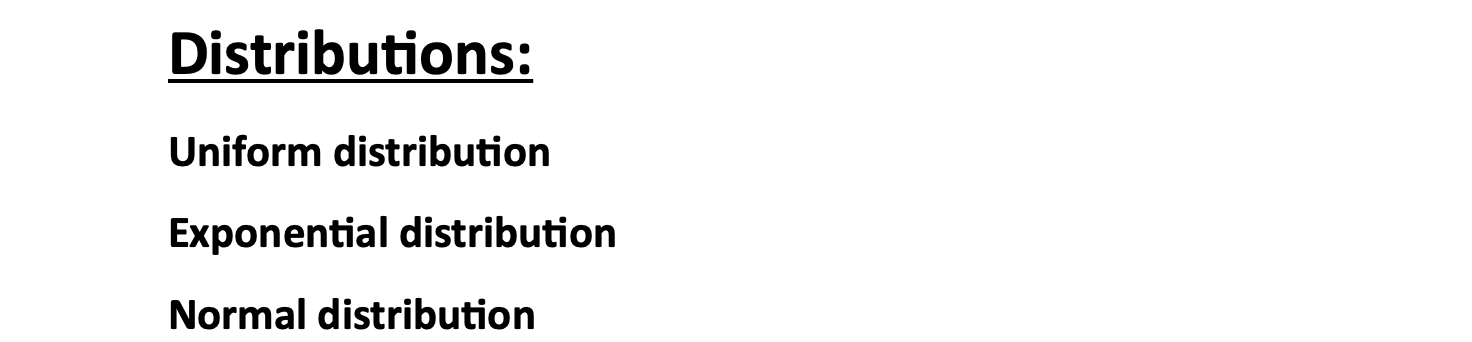

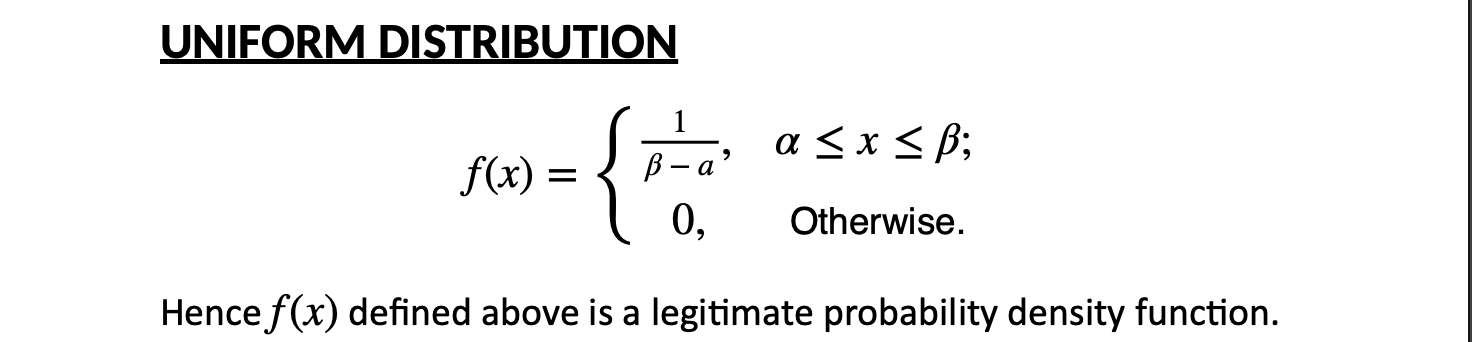

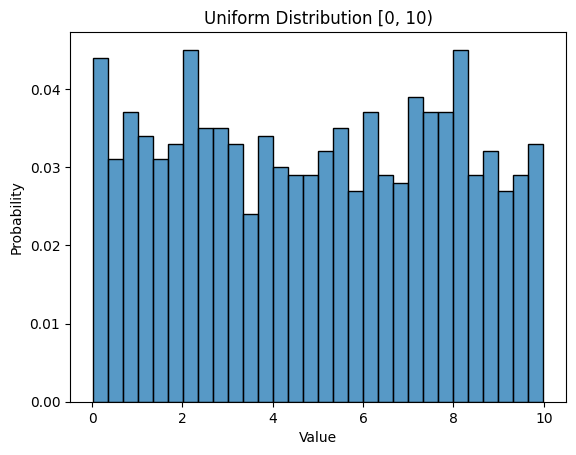

In [37]:
low = 0  
high = 10  
size = 1000  

data = np.random.uniform(low, high, size)

sns.histplot(data, bins=30, stat="probability", kde=False)
plt.title(f"Uniform Distribution [{low}, {high})")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.show()

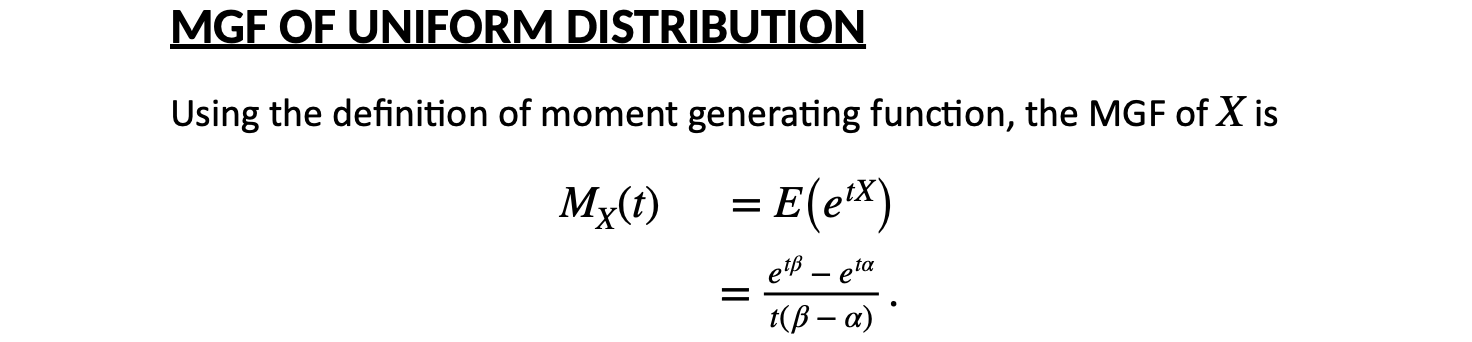

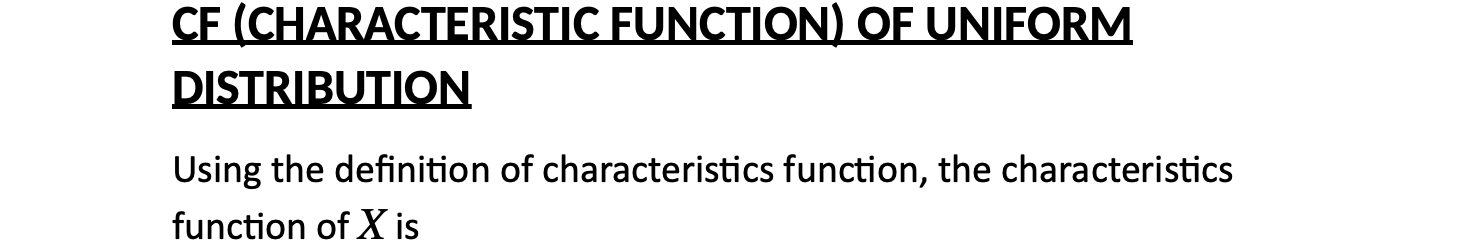

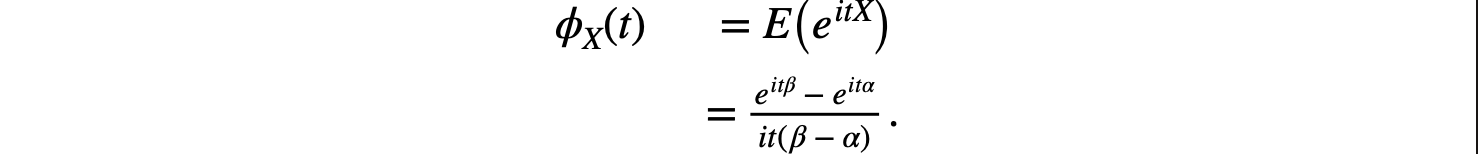

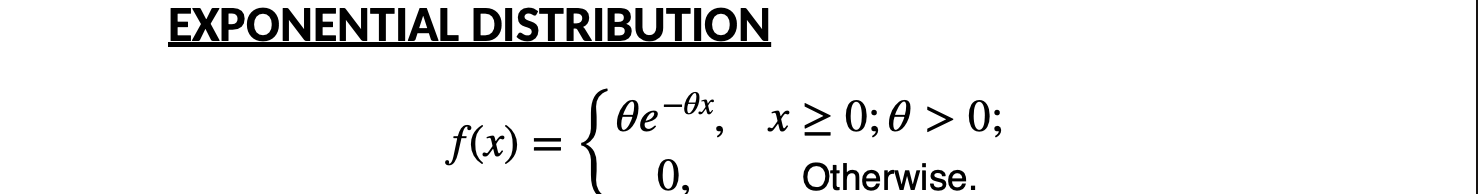

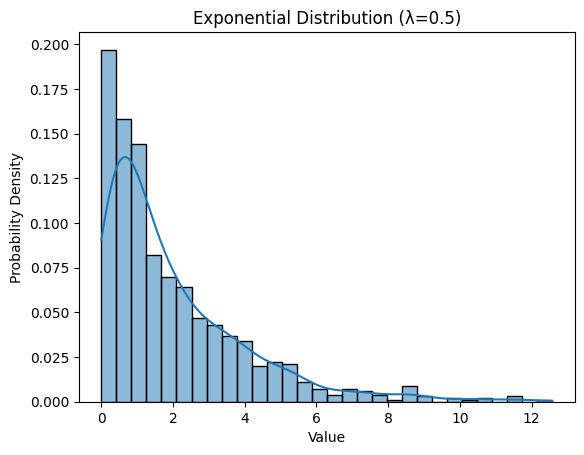

In [38]:

lam = 0.5  
size = 1000  

data = np.random.exponential(scale=1/lam, size=size)

sns.histplot(data, bins=30, stat="probability", kde=True)
plt.title(f"Exponential Distribution (λ={lam})")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.show()


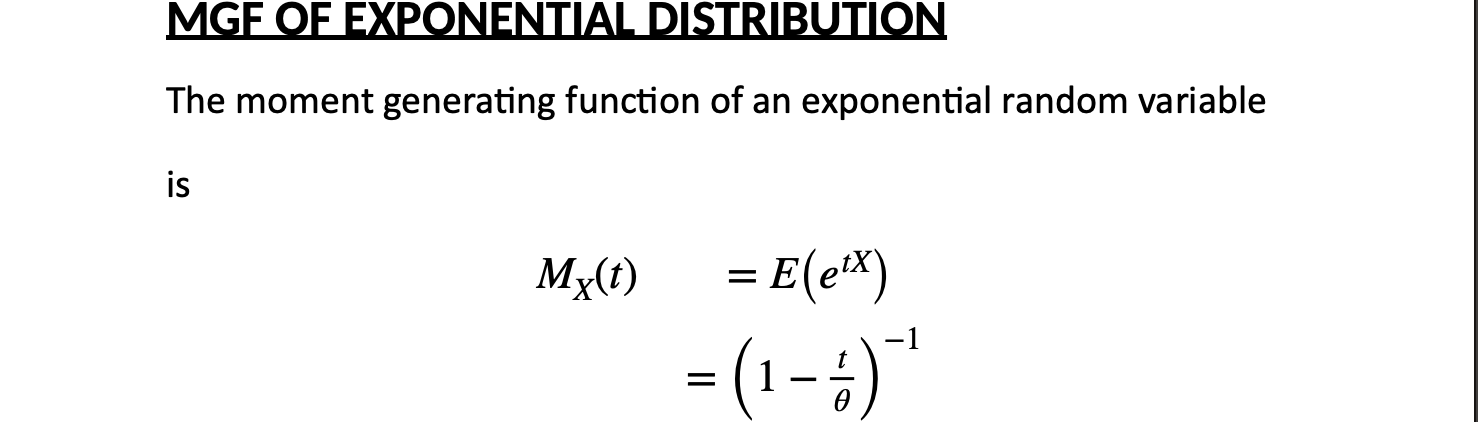

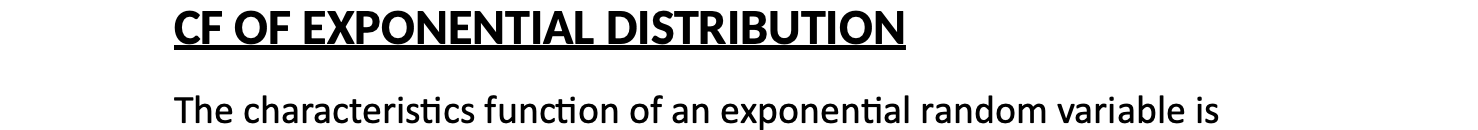

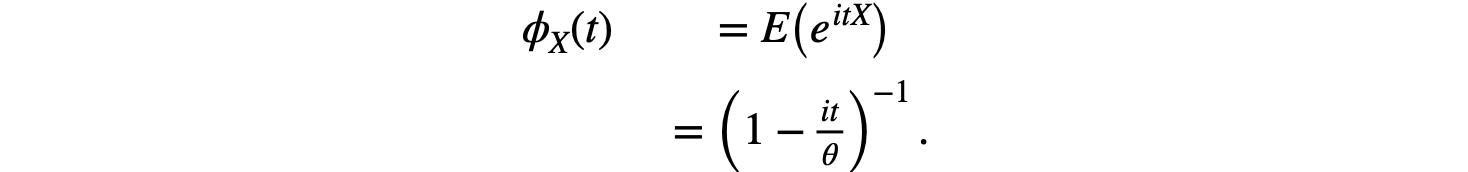

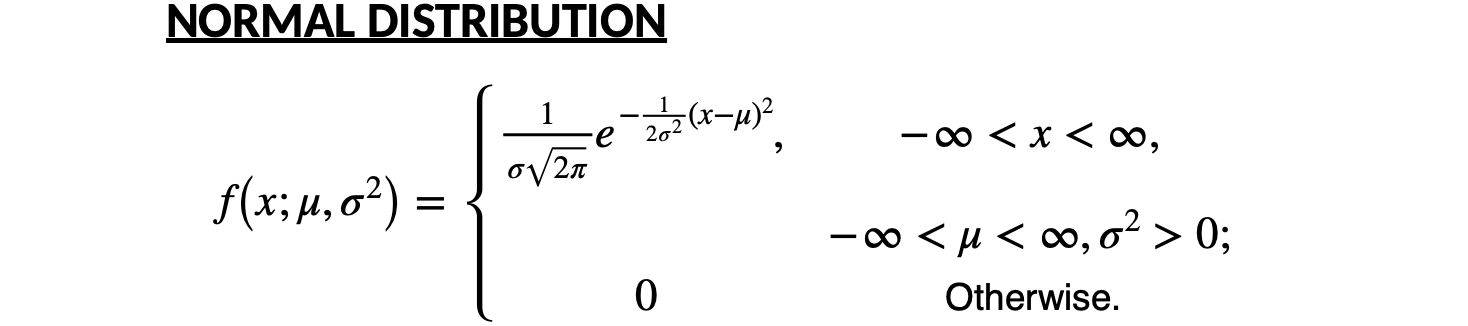

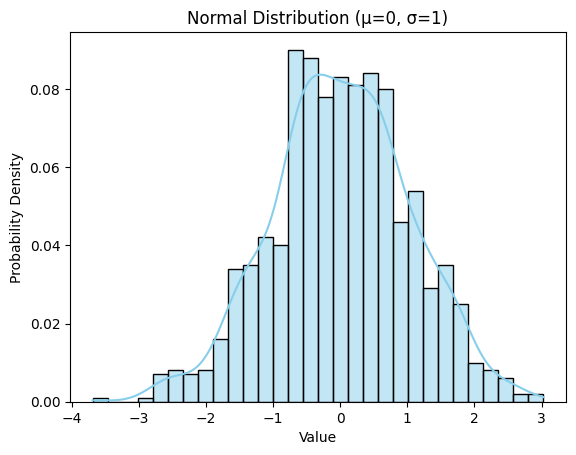

In [39]:
mu = 0  
sigma = 1  
size = 1000

data = np.random.normal(mu, sigma, size)

sns.histplot(data, bins=30, kde=True, stat="probability", color='skyblue')
plt.title(f"Normal Distribution (μ={mu}, σ={sigma})")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.show()


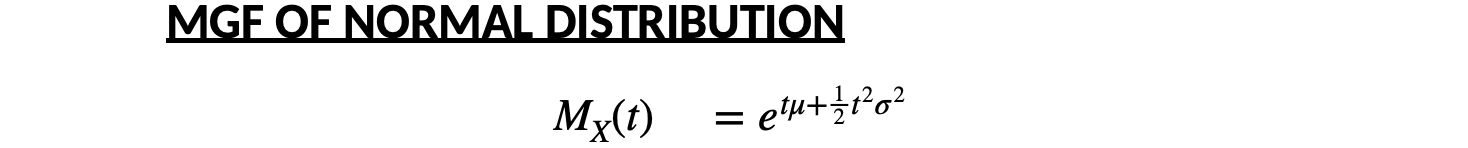

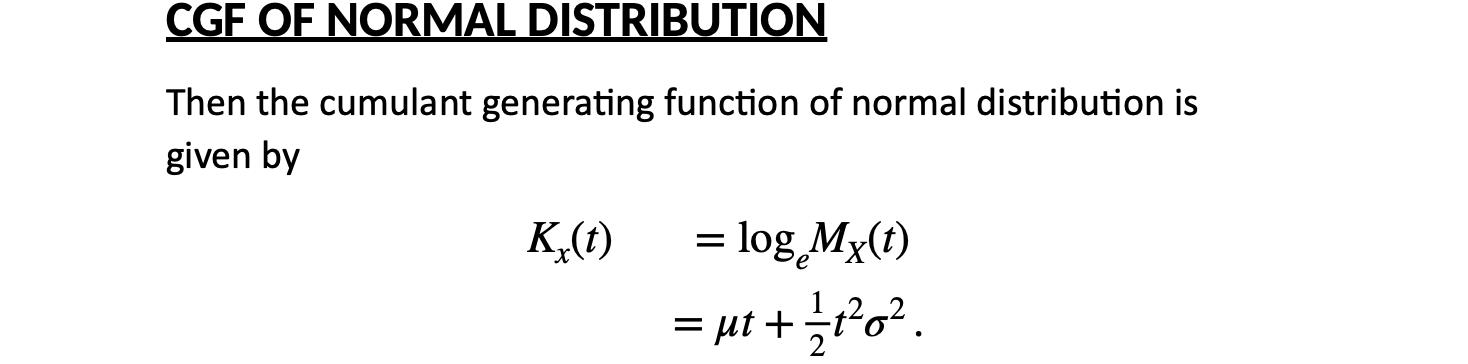

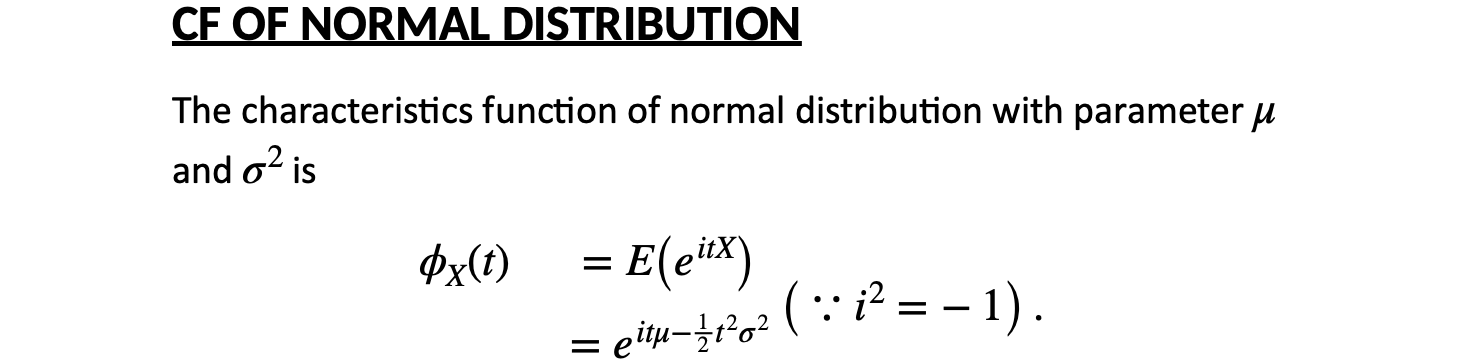

# Unit 5

## Scatter plot and Correlation


## Scatter Plot Application

Construct a scatter plot for the data obtained in a study on the
number of absences and the final grades of seven randomly
selected students from a statistics class. The data are shown here.

In [40]:
df = pd.read_csv('unit51.csv')
new_row = pd.DataFrame({'Absences': [11,18,1,7], 'Grade': [75,35,90,81]})
df = pd.concat([df, new_row], ignore_index=True)
df

,Absences,Grade
0,6,80
1,3,83
2,16,40
3,9,70
4,20,30
5,11,75
6,18,35
7,1,90
8,7,81


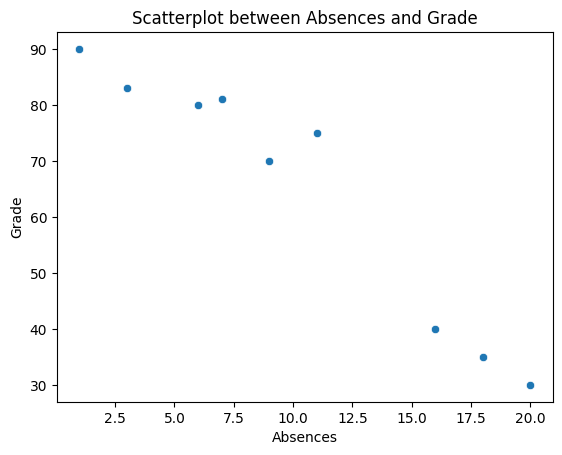

In [41]:
sns.scatterplot(x = 'Absences',y = 'Grade', data = df)
plt.xlabel('Absences') 
plt.ylabel('Grade')  ,
plt.title('Scatterplot between Absences and Grade')  
plt.show()

## Correlation

Statisticians use a measure called the correlation coefficient to determine the strength of
the linear relationship between two variables.

## Correlation Application

In order to calculate the correlaton between two variables we can use the following fromula to manually calculate the value.

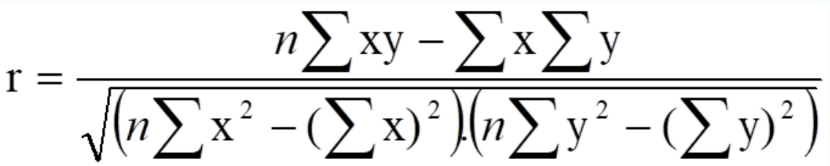

But, the Pandas library in Python provides an in-built function in order to calculate the correlation value between 2 variables 

Lets, calculate the correlation between the 'Absence' and 'Grade' variable from previous dataset

In [42]:
df

,Absences,Grade
0,6,80
1,3,83
2,16,40
3,9,70
4,20,30
5,11,75
6,18,35
7,1,90
8,7,81


In [43]:
correlation = df['Absences'].corr(df['Grade'])

In [44]:
correlation

-0.9631998882007398

## Scatter Plot with different correlation values


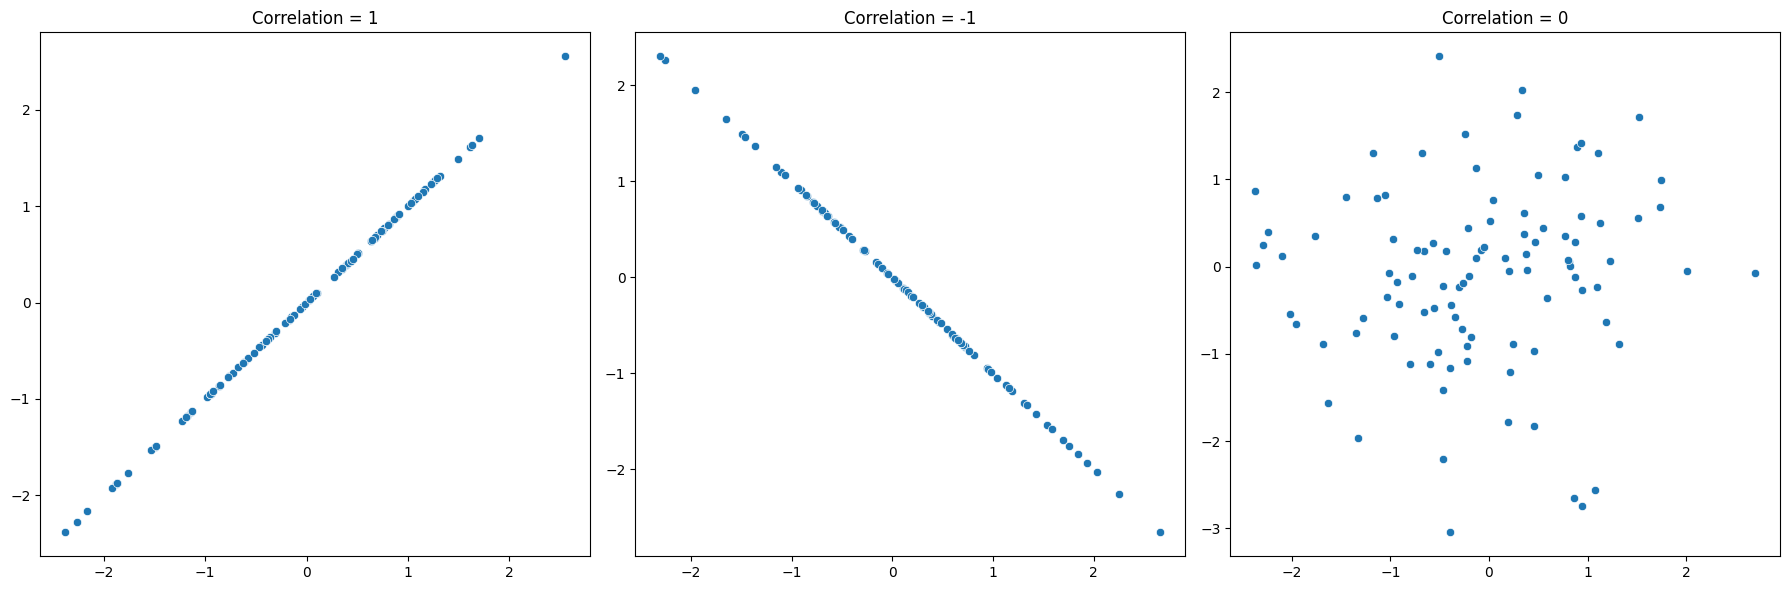

In [45]:
np.random.seed(0)

data_corr_1 = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 1], [1, 1]], size=100)

data_corr_neg_1 = np.random.multivariate_normal(mean=[0, 0], cov=[[1, -1], [-1, 1]], size=100)

data_corr_0 = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]], size=100)

plt.figure(figsize=(18, 6))

plt.subplot(131)
sns.scatterplot(x=data_corr_1[:, 0], y=data_corr_1[:, 1])
plt.title('Correlation = 1')

plt.subplot(132)
sns.scatterplot(x=data_corr_neg_1[:, 0], y=data_corr_neg_1[:, 1])
plt.title('Correlation = -1')

plt.subplot(133)
sns.scatterplot(x=data_corr_0[:, 0], y=data_corr_0[:, 1])
plt.title('Correlation = 0')

plt.tight_layout()
plt.show()

## Regression 

Stepping back towards the average or In
statistical modeling, regression analysis is a set of
statistical processes for estimating the relationships
between a dependent variable and one or more
independent variables.

## Formulas for the Regression Line ŷ=a+bx

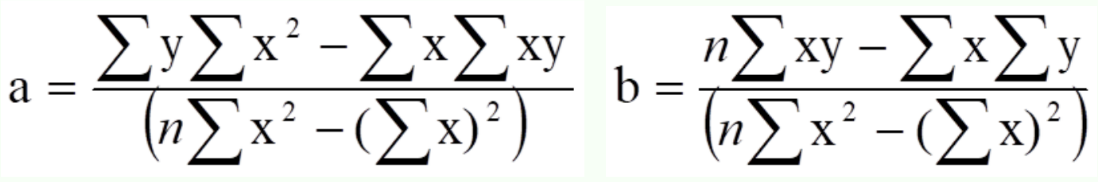

## Regression Application

In [46]:
df

,Absences,Grade
0,6,80
1,3,83
2,16,40
3,9,70
4,20,30
5,11,75
6,18,35
7,1,90
8,7,81


In [47]:
df['xy'] = df['Absences']*df['Grade']
df['x^2'] = df['Absences']**2 
n = 9
x_sum = df['Absences'].sum()
y_sum = df['Grade'].sum()
xy_sum = df['xy'].sum()
x2_sum = df['x^2'].sum()

df

,Absences,Grade,xy,x^2
0,6,80,480,36
1,3,83,249,9
2,16,40,640,256
3,9,70,630,81
4,20,30,600,400
5,11,75,825,121
6,18,35,630,324
7,1,90,90,1
8,7,81,567,49


In [48]:
# y = a + bx

a = (y_sum*x2_sum - x_sum*xy_sum)/(n*x2_sum - (x_sum)**2)
b = (n*xy_sum - x_sum*y_sum)/(n*x2_sum - (x_sum)**2)
print(a,b)

98.71326276463263 -3.3452677459526776


In [49]:
df['y'] = a + b*df['Absences']
df

,Absences,Grade,xy,x^2,y
0,6,80,480,36,78.641656
1,3,83,249,9,88.677460
2,16,40,640,256,45.188979
3,9,70,630,81,68.605853
4,20,30,600,400,31.807908
5,11,75,825,121,61.915318
6,18,35,630,324,38.498443
7,1,90,90,1,95.367995
8,7,81,567,49,75.296389


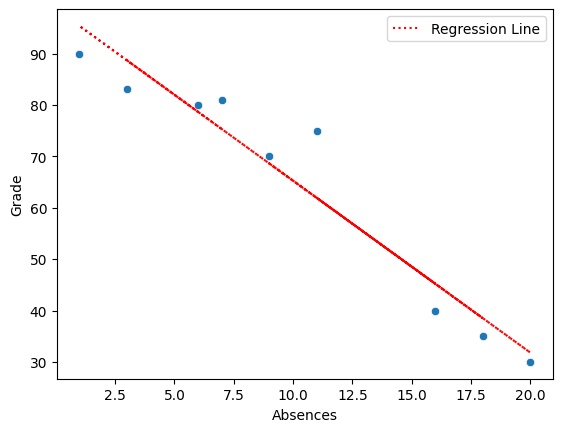

In [50]:
sns.scatterplot(x = 'Absences',y = 'Grade', data = df)
plt.plot(df['Absences'],df['y'], label='Regression Line', color='red', linestyle=':')
plt.legend()
plt.show()

### Application through direct functions provided by Python

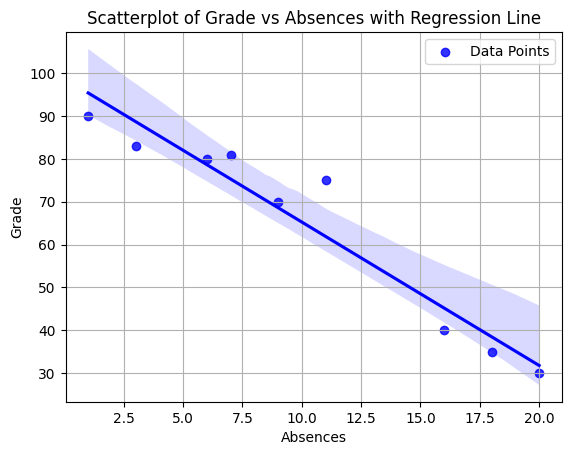

In [51]:
sns.regplot(x = df['Absences'], y = df['Grade'], scatter=True, color='blue', marker='o', label='Data Points')

# Adding labels and title
plt.xlabel('Absences')
plt.ylabel('Grade')
plt.title('Scatterplot of Grade vs Absences with Regression Line')

# Display the plot
plt.legend()
plt.grid(True)
plt.show()

# Thank You 